In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('homeprices.csv')
df


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


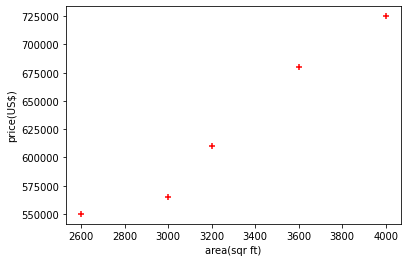

In [5]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')

In [13]:
df[['area']], df.price

(   area
 0  2600
 1  3000
 2  3200
 3  3600
 4  4000,
 0    550000
 1    565000
 2    610000
 3    680000
 4    725000
 Name: price, dtype: int64)

In [22]:

reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)
reg.predict([[3300]])

d:\users\apytl\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [24]:
reg.coef_, reg.intercept_

(array([135.78767123]), 180616.43835616432)

In [30]:
d =  pd.read_csv('areas.csv')
d.head(3)

p = reg.predict(d)
d['prices'] = p
d
d.to_csv("predictions.csv", index=False)

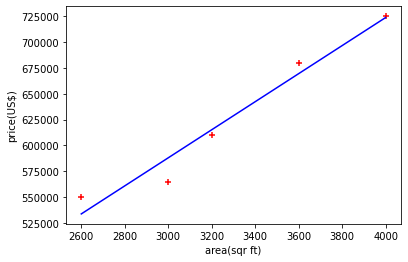

In [31]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

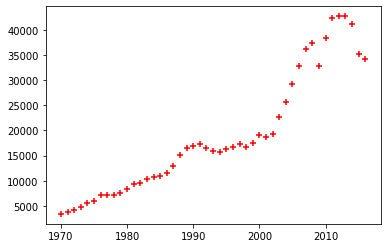

In [37]:
#Exercise --Canada per capita income

import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('canada_per_capita_income.csv')
#choice of a model

#matplotlib inline
plt.scatter(df.year, df['per capita income (US$)'], color='red', marker='+')

In [52]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']], df['per capita income (US$)'])
reg.predict([[2021], [2022]])

d:\users\apytl\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42117.15916964, 42945.62424486])

In [59]:
# predictions =  pd.read_csv('canada_per_capita_income.csv')
# years = [[2021], [2022], [2023], [2024], [2025]]
# predictions['predictions'] = reg.predict(years)
# predictions.to_csv("canada_per_capita_income.csv", index=False)

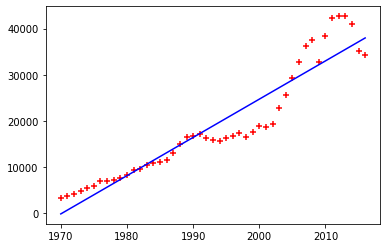

In [57]:
%matplotlib inline
plt.scatter(df.year, df['per capita income (US$)'], color='red', marker='+')
plt.plot(df.year, reg.predict(df[['year']]), color='blue')

In [67]:
#another approach
import pandas as pd
from sklearn.model_selection import train_test_split # to split our data
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

income = pd.read_csv('canada_per_capita_income.csv')
X = income.drop(columns='per capita income (US$)')
Y = income['per capita income (US$)']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)
model = linear_model.LinearRegression()
model.fit(Xtrain, Ytrain)
predictions =  model.predict(Xtest)

#precision

score = accuracy_score(Ytest, predictions)
score

ValueError: continuous is not supported